In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import *
import time

In [3]:
def delta(v_t_fire):
    if v_t_fire == 1.:
        return 1
    else:
        return 0

def depressing_synapses_model(x_t, y_t, z_t, t_rec, t_in, U, dt, v_t_fire):    
    dx = z_t / t_rec - U * x_t * delta(v_t_fire) * (1/dt)
    dy = - y_t / t_in + U * x_t * delta(v_t_fire) * (1/dt)
    dz = - z_t / t_rec + y_t / t_in
    
    x_t_ = x_t + dx * dt
    y_t_ = y_t + dy * dt
    z_t_ = z_t + dz * dt
    return x_t_, y_t_, z_t_

def IF_neuron(v_t, t_mem, I_syn, I_b, dt, v_t_fire, current_time, i_th_neuron):
    dv = (- v_t + I_syn + I_b) / t_mem
    v_t_ = v_t + dv * dt
    if v_t_ >= 15.:
        v_t_ = 13.5
        v_t_fire[i_th_neuron, current_time] = 1.
        #print("neuron fired !")
    
    return v_t_

def raster(event_times_list, **kwargs):
    """
    Creates a raster plot
    Parameters
    ----------
    event_times_list : iterable
                       a list of event time iterables
    color : string
            color of vlines
    Returns
    -------
    ax : an axis containing the raster plot
    """
    ax = plt.gca()
    for ith, trial in enumerate(event_times_list):
        plt.vlines(trial, ith + .5, ith + 1.5, **kwargs)
    plt.ylim(.5, len(event_times_list) + .5)
    return ax

In [4]:
N = 400

J_ij = np.empty((0, N))
for i in range(N):
    tmp = np.zeros((1,N))
    for j in range(N):
        if randint(10) % 10 == 1:
            tmp[0, j] = np.random.normal(1, 0.5, 1)
    J_ij = np.append(J_ij, tmp, axis = 0)
    
#print(A_ij[0,:])

In [5]:
x = 0.5
y = 0.5
z = 1 - x - y

#mili second
t_in= 3
t_mem = 30

U = np.zeros(N)
for i in range(N):
    U[i] = np.clip(np.random.normal(loc = 0.5, scale = 0.25, size = 1), 0.1, 0.9)

I_b = np.zeros(N)
for i in range(N):
    I_b[i] = np.random.normal(loc = 14.7 - 0.4, scale = 14.7 + 0.4, size = 1)

t_rec = np.zeros(N)
for i in range(N):
    t_rec[i] = np.clip(np.random.normal(loc = 800, scale = 400, size = 1), 5, None)
    
dt = 0.1

Total = 1000
T = Total * (1/dt)
intT = int(T)

times = np.zeros(intT)

v_t = np.zeros((N, intT))
v_t_fire = np.zeros((N, intT))
x_t = np.zeros((intT, N, N))
y_t = np.zeros((intT, N, N))
z_t = np.zeros((intT, N, N,))

# for debugging
I_syn = np.zeros(intT)

v_t[:,0] = 14.
x_t[0, :, :] = x
y_t[0, :, :] = y
z_t[0, :, :] = z

start = time.time()

for t in range(intT - 1):
    # this is i * dt mili second
    times[t+1] = t * dt

    if t % 1000 == 0:
        print("this is time {} ms/{} --- {} from previous stamp".format(t * dt, Total, time.time() - start))
        start = time.time()
    for i in range(N):
        # calculate the variable of i_th neuron
        I_syn_i = 0.
        if (t +1) % 10 == 0:
            I_b[i] = np.random.normal(loc = 14.7 - 0.4, scale = 14.7 + 0.4, size = 1)
        for j in range(N):
            # j_th synapse of i_th neuron
            # calculate I_syn = sum_of J_ij * e_t_ij
            if j == i:
                pass
            else:
                #if i == 0:
                #    print("{} I_syn_{}".format(A_ij[j, i] * e_t[t, j, i], i))
                #    print("{} e_{}".format(e_t[t, :, :],t))
                #    print("{} r_t[t, i, j], {} e_t[t, i, j], {} ina_t[t, i, j], {} u_t[t, i, j]".format(r_t[t, i, j], e_t[t, i, j], ina_t[t, i, j], u_t[t, i, j]))
                x_t[t+1, i, j], y_t[t+1, i, j], z_t[t+1, i, j] = depressing_synapses_model(x_t[t, i, j], y_t[t, i, j], z_t[t, i, j], t_rec[i], t_in, U[i], dt, v_t_fire[i, t])
            I_syn_i += J_ij[j, i] * y_t[t, j, i]
        #if i == 0:
        #    print("{} I_syn_i total".format(I_syn_i))
        v_t[i, t+1] = IF_neuron(v_t[i, t], t_mem, I_syn_i, I_b[i], dt, v_t_fire, t, i)  
    if t == intT - 2:
        print("this is time {}\ndone !".format((t + 2)* dt))

this is time 0.0 ms/1000 --- 0.0002486705780029297 from previous stamp
this is time 100.0 ms/1000 --- 763.9575052261353 from previous stamp
this is time 200.0 ms/1000 --- 771.021106004715 from previous stamp
this is time 300.0 ms/1000 --- 776.756000995636 from previous stamp
this is time 400.0 ms/1000 --- 772.5203740596771 from previous stamp
this is time 500.0 ms/1000 --- 769.7241280078888 from previous stamp
this is time 600.0 ms/1000 --- 773.0702569484711 from previous stamp
this is time 700.0 ms/1000 --- 777.6466879844666 from previous stamp
this is time 800.0 ms/1000 --- 783.1707372665405 from previous stamp
this is time 900.0 ms/1000 --- 777.6114802360535 from previous stamp
this is time 1000.0 ms/1000 --- 774.848363161087 from previous stamp
this is time 1100.0 ms/1000 --- 774.4006597995758 from previous stamp


KeyboardInterrupt: 

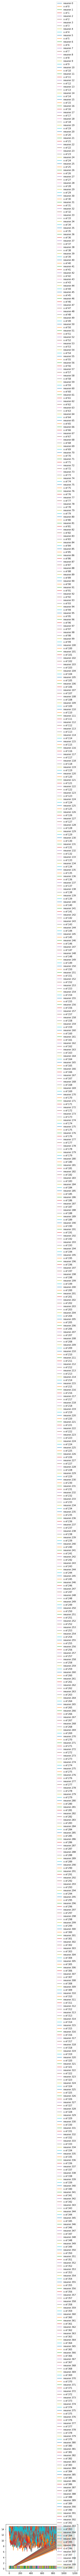

In [6]:
for i in range(N):
    plt.plot(times, v_t_fire[i, :], label='neuron {}'.format(i))
    plt.plot(times, v_t[i, :], label='v of {}'.format(i))

plt.legend(loc="lower right")

/Users/soliton/.pyenv/versions/anaconda3-4.2.0/envs/dynamicsenv/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


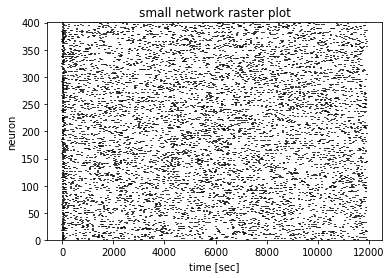

In [7]:
spikes = []

for j in range(N):
    spike = []
    for i in range(intT):
        if v_t_fire[j,i] == 1:
            spike.append(i)
            #print("{}th neuron fired spike appended".format(j))
    spikes.append(spike)
            
fig = plt.figure()
ax = raster(spikes)
plt.title('small network raster plot')
plt.xlabel('time [sec]')
plt.ylabel('neuron')
fig.show()